C:\Python\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l

Logistic Regression Accuracy: 0.6527777777777778
SVM Accuracy: 0.8194444444444444
Decision Tree Accuracy: 0.8055555555555556
K-Nearest Neighbors Accuracy: 0.7361111111111112


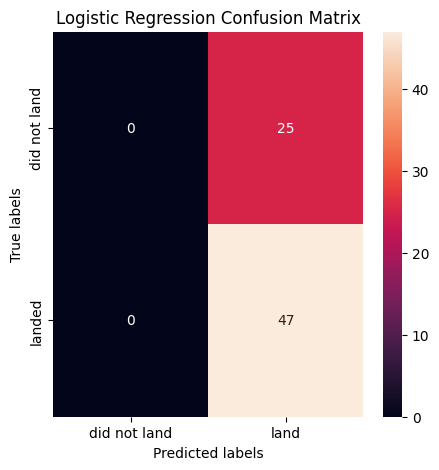

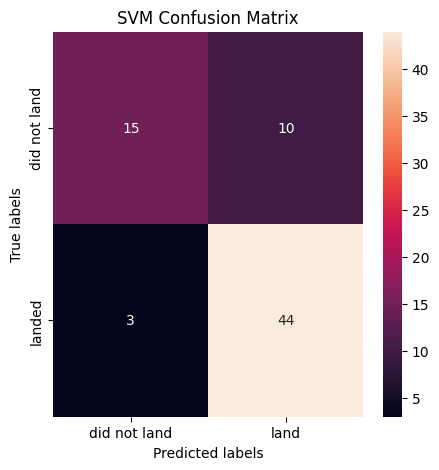

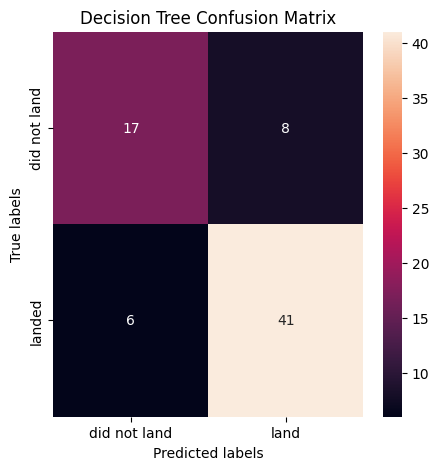

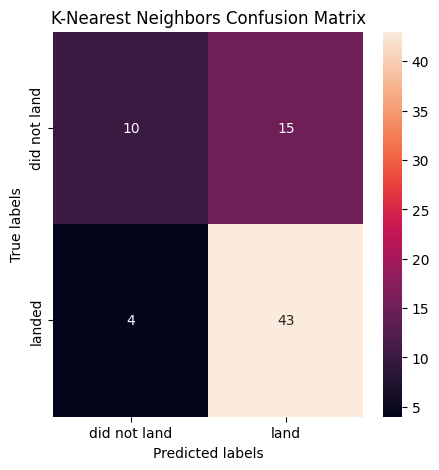

In [26]:
# Pandas is a software library for data manipulation and analysis.
import pandas as pd
# NumPy is a library for handling large multi-dimensional arrays and matrices.
import numpy as np
# Matplotlib is used for data visualization.
import matplotlib.pyplot as plt
# Seaborn is a data visualization library based on Matplotlib.
import seaborn as sns
# Preprocessing for data standardization.
from sklearn import preprocessing
# Train-test split for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# GridSearchCV for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# Classification algorithms we will use.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
# Load the data including Class - the predicted value
data = pd.read_csv("dataset_part_2.csv")

# Load variables
X = pd.read_csv('dataset_part_3.csv')

# Create a NumPy array from the column Class in data and assign it to the variable Y.
Y = data['Class'].to_numpy()

# Standardize the data in X and reassign it to the variable X.
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=2)

# Create and initialize classification models
logistic_reg = LogisticRegression()
svm = SVC()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_logistic = GridSearchCV(logistic_reg, param_grid_logistic, cv=5)
grid_logistic.fit(X_train, Y_train)

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, Y_train)

# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, Y_train)

# Hyperparameter tuning for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, Y_train)

# Evaluate Logistic Regression
logistic_reg = grid_logistic.best_estimator_
logistic_reg_accuracy = logistic_reg.score(X_test, Y_test)
logistic_reg_predict = logistic_reg.predict(X_test)

# Evaluate SVM
svm = grid_svm.best_estimator_
svm_accuracy = svm.score(X_test, Y_test)
svm_predict = svm.predict(X_test)

# Evaluate Decision Tree
decision_tree = grid_tree.best_estimator_
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_predict = decision_tree.predict(X_test)

# Evaluate K-Nearest Neighbors
knn = grid_knn.best_estimator_
knn_accuracy = knn.score(X_test, Y_test)
knn_predict = knn.predict(X_test)

# Print Accuracy for each model
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, logistic_reg_predict)
plt.title("Logistic Regression Confusion Matrix")

# Confusion Matrix for SVM
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, svm_predict)
plt.title("SVM Confusion Matrix")

# Confusion Matrix for Decision Tree
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, decision_tree_predict)
plt.title("Decision Tree Confusion Matrix")

# Confusion Matrix for K-Nearest Neighbors
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, knn_predict)
plt.title("K-Nearest Neighbors Confusion Matrix")

# Display the confusion matrix visualizations
plt.show()


In [28]:
# Pandas is a software library for data manipulation and analysis.
import pandas as pd
# NumPy is a library for handling large multi-dimensional arrays and matrices.
import numpy as np
# Matplotlib is used for data visualization.
import matplotlib.pyplot as plt
# Seaborn is a data visualization library based on Matplotlib.
import seaborn as sns
# Preprocessing for data standardization.
from sklearn import preprocessing
# Train-test split for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
# GridSearchCV for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
# Classification algorithms we will use.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# Import the additional classification models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

# Load the data including Class - the predicted value
data = pd.read_csv("dataset_part_2.csv")

# Load variables
X = pd.read_csv('dataset_part_3.csv')

# Create a NumPy array from the column Class in data and assign it to the variable Y.
Y = data['Class'].to_numpy()

# Standardize the data in X and reassign it to the variable X.
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, random_state=2)

# Create and initialize classification models
logistic_reg = LogisticRegression()
svm = SVC()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
naive_bayes = GaussianNB()

# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_logistic = GridSearchCV(logistic_reg, param_grid_logistic, cv=5)
grid_logistic.fit(X_train, Y_train)

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_svm.fit(X_train, Y_train)

# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, Y_train)

# Hyperparameter tuning for K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, Y_train)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_rf.fit(X_train, Y_train)

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 4, 5, 6],
}
grid_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)
grid_gb.fit(X_train, Y_train)

# No hyperparameter tuning required for Naive Bayes

# Evaluate Logistic Regression
logistic_reg = grid_logistic.best_estimator_
logistic_reg_accuracy = logistic_reg.score(X_test, Y_test)
logistic_reg_predict = logistic_reg.predict(X_test)

# Evaluate SVM
svm = grid_svm.best_estimator_
svm_accuracy = svm.score(X_test, Y_test)
svm_predict = svm.predict(X_test)

# Evaluate Decision Tree
decision_tree = grid_tree.best_estimator_
decision_tree_accuracy = decision_tree.score(X_test, Y_test)
decision_tree_predict = decision_tree.predict(X_test)

# Evaluate K-Nearest Neighbors
knn = grid_knn.best_estimator_
knn_accuracy = knn.score(X_test, Y_test)
knn_predict = knn.predict(X_test)

# Evaluate Random Forest
random_forest = grid_rf.best_estimator_
rf_accuracy = random_forest.score(X_test, Y_test)
rf_predict = random_forest.predict(X_test)

# Evaluate Gradient Boosting
gradient_boosting = grid_gb.best_estimator_
gb_accuracy = gradient_boosting.score(X_test, Y_test)
gb_predict = gradient_boosting.predict(X_test)

# Evaluate Naive Bayes
naive_bayes_accuracy = naive_bayes.score(X_test, Y_test)
naive_bayes_predict = naive_bayes.predict(X_test)

# Print Accuracy for each model
print("Logistic Regression Accuracy:", logistic_reg_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, logistic_reg_predict)
plt.title("Logistic Regression Confusion Matrix")

# Confusion Matrix for SVM
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, svm_predict)
plt.title("SVM Confusion Matrix")

# Confusion Matrix for Decision Tree
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, decision_tree_predict)
plt.title("Decision Tree Confusion Matrix")

# Confusion Matrix for K-Nearest Neighbors
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, knn_predict)
plt.title("K-Nearest Neighbors Confusion Matrix")

# Confusion Matrix for Random Forest
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, rf_predict)
plt.title("Random Forest Confusion Matrix")

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, gb_predict)
plt.title("Gradient Boosting Confusion Matrix")

# Confusion Matrix for Naive Bayes
plt.figure(figsize=(5, 5))
plot_confusion_matrix(Y_test, naive_bayes_predict)
plt.title("Naive Bayes Confusion Matrix")

# Display the confusion matrix visualizations
plt.show()


C:\Python\myenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python\myenv\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.